# Fraud case study



## Day 1: building a fraud model

## Day 2: building an app/dashboard

## Tips success

You will quickly run out of time:

*  Use CRISP-DM workflow to analyze data and build a model
*  Iterate quickly, test often, commit often
*  Build deadlines for your work so you stay on track
*  Should have a model by end of day 1
*  Start app once model is working

### CRISP-DM workflow

Follow the [CRISP-DM](https://en.wikipedia.org/wiki/Cross_Industry_Standard_Process_for_Data_Mining) steps:

1.  Business understanding
2.  Data understanding
3.  Data preparation
4.  Modeling
5.  Evaluation
6.  Deployment

# Introduction to case study: data & problem

Let's look at the data.  What format is the data in?  How do you extract it?

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as scs
import re


%matplotlib inline
plt.style.use('ggplot')
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
plt.rcParams["figure.figsize"] = (12,12)
pd.options.display.max_columns = None

Unzip the data so you can load it into Python

Initially, work with a subset at first in order to iterate quickly.  But, the file is one giant line of json:

Write a quick and dirty script to pull out the first 100 records so we can get code working quickly.

Some of the data is text (and HTML), which will require feature engineering:

* TF-IDF
* Feature hashing
* n-grams

etc.

You will also need to construct a target from `acct_type`.  Fraud events start with `fraud`.  How you define fraud depends on how you define the business problem.

Is missing data a problem?  What are your options for handling missing data?

In [71]:
ls

FraudCaseStudyOverviewEddie.ipynb


In [72]:
ls data

ls: cannot access 'data': No such file or directory


In [73]:
df = pd.read_json('../data/data.json')

In [74]:
df.shape

(14337, 44)

In [75]:
df.head().T

,0,1,2,3,4
acct_type,fraudster_event,premium,premium,premium,premium
approx_payout_date,1266062400,1296720000,1296172800,1388966400,1297900800
body_length,3852,3499,2601,12347,2417
channels,5,0,8,6,11
country,US,US,US,IE,US
currency,USD,USD,USD,EUR,USD
delivery_method,0,1,1,1,0
description,"<p><a href=""http://s432.photobucket.com/albums...","<p>Join us for a quick, one-night, community-b...","<h3><span class=""subcategory""><strong>Teacher ...","<p style=""margin-bottom: 1.3em; padding-bottom...",<p>Writers and filmmakers need to understand t...
email_domain,gmail.com,ruf.org,pvsd.k12.ca.us,irishtabletennis.com,artsandbusinesscouncil.org
event_created,1262739706,1293832670,1291090956,1360681570,1291994666


In [76]:
df['user_created'][0]

1259613950

In [77]:
pd.to_datetime(df['user_created'], unit='s')

0       2009-11-30 20:45:50
1       2010-08-04 17:26:16
2       2010-04-29 16:43:08
3       2010-09-07 14:35:02
4       2010-11-05 19:07:45
5       2010-03-14 15:05:10
6       2009-01-31 21:39:11
7       2010-10-28 14:28:23
8       2011-01-07 19:22:01
9       2010-10-28 14:28:23
10      2009-01-08 17:43:32
11      2009-11-14 06:37:44
12      2008-11-04 11:57:00
13      2009-10-18 09:16:01
14      2010-07-13 18:34:35
15      2010-01-28 20:13:54
16      2010-01-28 20:13:54
17      2011-02-12 03:04:26
18      2009-03-04 15:00:30
19      2011-02-12 00:24:02
20      2011-02-12 09:13:01
21      2010-01-26 06:28:00
22      2009-11-30 17:43:39
23      2009-12-02 20:34:19
24      2010-11-12 17:56:44
25      2009-09-12 04:18:43
26      2011-01-21 02:26:17
27      2010-06-30 15:54:05
28      2010-07-14 19:47:32
29      2008-12-08 04:52:16
                ...        
14307   2011-06-22 21:25:54
14308   2012-01-19 07:46:05
14309   2012-02-10 10:13:36
14310   2012-12-13 22:27:19
14311   2013-01-16 2

In [78]:
df['user_created'].apply(lambda x: datetime.datetime(x).strftime('%c'))

TypeError: Required argument 'month' (pos 2) not found

In [ ]:
df.describe().T

In [ ]:
df.acct_type.value_counts()

In [ ]:
df.count() / max(df.count()) * 100

In [ ]:
list(df.org_name.unique())

In [ ]:
len(df.previous_payouts[1]) # add len of previous_payouts

In [ ]:
df.previous_payouts[1]

In [ ]:
df.iloc[1, :]

In [ ]:
df.venue_name.value_counts()

In [ ]:
df['acct_type'].value_counts()

# ADD COLUMNS

In [79]:
df = pd.read_json('../data/data.json')

In [80]:
fill_per = df.count() / max(df.count()) * 100

In [81]:
less_than_100 = fill_per[fill_per<100].index
less_than_100

Index(['country', 'delivery_method', 'event_published', 'has_header',
       'org_facebook', 'org_twitter', 'sale_duration', 'venue_country',
       'venue_latitude', 'venue_longitude', 'venue_name', 'venue_state'],
      dtype='object')

In [82]:
for col in less_than_100:
    col_mode = df[col].mode()[0]
    df[col].fillna(col_mode, inplace=True)

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14337 entries, 0 to 14336
Data columns (total 44 columns):
acct_type             14337 non-null object
approx_payout_date    14337 non-null int64
body_length           14337 non-null int64
channels              14337 non-null int64
country               14337 non-null object
currency              14337 non-null object
delivery_method       14337 non-null float64
description           14337 non-null object
email_domain          14337 non-null object
event_created         14337 non-null int64
event_end             14337 non-null int64
event_published       14337 non-null float64
event_start           14337 non-null int64
fb_published          14337 non-null int64
gts                   14337 non-null float64
has_analytics         14337 non-null int64
has_header            14337 non-null float64
has_logo              14337 non-null int64
listed                14337 non-null object
name                  14337 non-null object
name_length     

In [84]:
def fraud_check(row):
    if 'fraud' in row:
        return 1
    else:
        return 0

In [85]:
df['fraud'] = df['acct_type'].apply(fraud_check)

In [86]:
df['fraud'].value_counts()

0    13044
1     1293
Name: fraud, dtype: int64

In [87]:
round((1 - (sum(df['fraud'] == 1) / len(df['fraud']))) * 100,2)

90.980000000000004

TypeError: unsupported operand type(s) for -: 'str' and 'float'

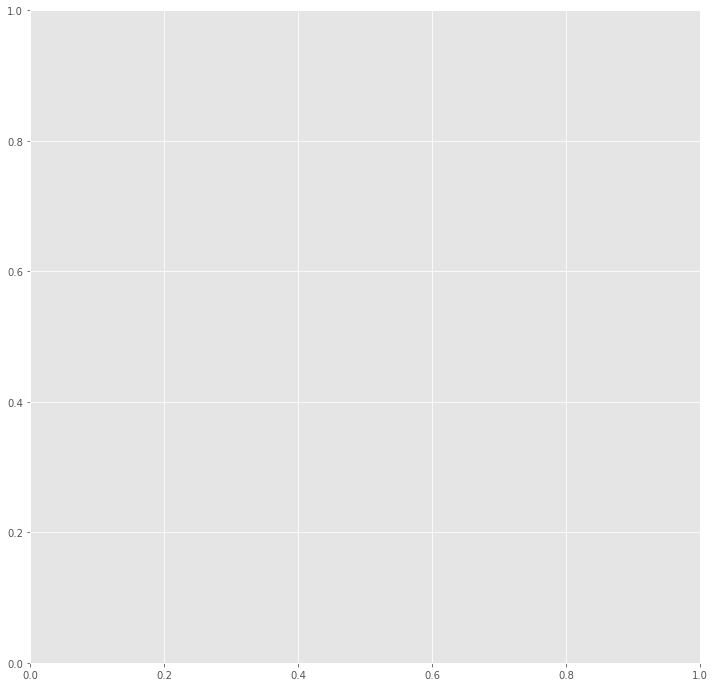

In [92]:
plt.bar(df.currency.value_counts().index, df.currency.value_counts().values)

In [43]:
df['description_len'] = df['description'].apply(lambda x: len(x))
df['listed'] = df['listed'].map({'y': 1, 'n': 0})
df = pd.get_dummies(df, columns=['currency'])

In [44]:
df['len_pp'] = df['previous_payouts'].apply(lambda x: len(x))

In [45]:
good_email_list = df.email_domain.value_counts()[df.email_domain.value_counts() > 150].index
def good_email(x):
    if x in good_email_list:
        return 1
    else:
        return 0

In [46]:
df['good_email'] = df['email_domain'].apply(good_email)

In [47]:
good_country_list = df.country.value_counts()[df.country.value_counts() > 500].index
def good_country(x):
    if x in good_country_list:
        return 1
    else:
        return 0

In [48]:
df['good_country'] = df['country'].apply(good_country)

In [49]:
df['len_tt'] = df['ticket_types'].apply(lambda x: len(x))

In [50]:
def quant_sold(x):
    q_sold = 0
    for j in x:
        q_sold+=j['quantity_sold']
    return q_sold

In [51]:
df['q_sold'] = df['ticket_types'].apply(quant_sold)

In [52]:
df.head().T

,0,1,2,3,4
acct_type,fraudster_event,premium,premium,premium,premium
approx_payout_date,1266062400,1296720000,1296172800,1388966400,1297900800
body_length,3852,3499,2601,12347,2417
channels,5,0,8,6,11
country,US,US,US,IE,US
delivery_method,0,1,1,1,0
description,"<p><a href=""http://s432.photobucket.com/albums...","<p>Join us for a quick, one-night, community-b...","<h3><span class=""subcategory""><strong>Teacher ...","<p style=""margin-bottom: 1.3em; padding-bottom...",<p>Writers and filmmakers need to understand t...
email_domain,gmail.com,ruf.org,pvsd.k12.ca.us,irishtabletennis.com,artsandbusinesscouncil.org
event_created,1262739706,1293832670,1291090956,1360681570,1291994666
event_end,1265630400,1296288000,1295740800,1388534400,1297468800


In [53]:
df.country.value_counts()

US    9315
GB    2083
CA    1262
AU     742
       316
NZ      73
IE      48
MA      47
DE      43
FR      40
NL      36
VN      32
ES      27
A1      25
PK      22
BE      18
HU      18
PH      15
ID      12
PR      10
CI       9
RO       8
AR       8
AT       8
SG       7
CZ       7
NG       7
DZ       6
TH       6
CH       6
      ... 
GR       2
CN       2
NA       2
TR       2
RU       2
MX       2
CM       2
QA       2
UY       2
PT       2
KE       1
IM       1
EC       1
BS       1
AE       1
IL       1
VI       1
IS       1
LB       1
BB       1
VE       1
NI       1
PS       1
CO       1
JE       1
PE       1
CR       1
SI       1
DK       1
TJ       1
Name: country, Length: 72, dtype: int64

In [696]:
df.previous_payouts[0]

[]

In [697]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14337 entries, 0 to 14336
Data columns (total 57 columns):
acct_type             14337 non-null object
approx_payout_date    14337 non-null int64
body_length           14337 non-null int64
channels              14337 non-null int64
country               14337 non-null object
delivery_method       14337 non-null float64
description           14337 non-null object
email_domain          14337 non-null object
event_created         14337 non-null int64
event_end             14337 non-null int64
event_published       14337 non-null float64
event_start           14337 non-null int64
fb_published          14337 non-null int64
gts                   14337 non-null float64
has_analytics         14337 non-null int64
has_header            14337 non-null float64
has_logo              14337 non-null int64
listed                14337 non-null int64
name                  14337 non-null object
name_length           14337 non-null int64
num_order         

In [698]:
fraud_corr = abs(df.corr()['fraud']).sort_values(ascending=False)
fraud_corr

fraud                 1.000000
event_published       0.242872
good_country          0.224533
user_age              0.215929
user_type             0.213911
org_twitter           0.210117
delivery_method       0.195073
sale_duration         0.192825
good_email            0.191903
org_facebook          0.186266
user_created          0.184360
sale_duration2        0.179550
has_logo              0.169485
channels              0.165358
name_length           0.158447
body_length           0.118308
description_len       0.117760
venue_longitude       0.114811
venue_latitude        0.100896
fb_published          0.099143
len_pp                0.098288
currency_GBP          0.095953
has_header            0.093019
has_analytics         0.084626
num_payouts           0.083433
len_tt                0.079066
num_order             0.078008
show_map              0.076217
currency_CAD          0.064995
currency_AUD          0.062578
q_sold                0.057019
event_start           0.044995
approx_p

In [699]:
good_columns = fraud_corr[fraud_corr > .08].index
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num_df = df.select_dtypes(include=numerics)
num_columns = num_df.columns

In [700]:
len(good_columns)

25

In [703]:
num_columns

Index(['approx_payout_date', 'body_length', 'channels', 'delivery_method',
       'event_created', 'event_end', 'event_published', 'event_start',
       'fb_published', 'gts', 'has_analytics', 'has_header', 'has_logo',
       'listed', 'name_length', 'num_order', 'num_payouts', 'object_id',
       'org_facebook', 'org_twitter', 'sale_duration', 'sale_duration2',
       'show_map', 'user_age', 'user_created', 'user_type', 'venue_latitude',
       'venue_longitude', 'fraud', 'description_len', 'len_pp', 'good_email',
       'good_country', 'len_tt', 'q_sold'],
      dtype='object')

In [704]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import recall_score, accuracy_score, precision_score
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc, classification_report
from sklearn.svm import SVC

In [705]:
from imblearn.over_sampling import SMOTE
def smote_sample(X_train, y_train, seed=321):
    sm = SMOTE(random_state=seed)
    X_train_res, y_train_res = sm.fit_sample(X_train, y_train)
    return X_train_res, y_train_res

In [706]:
clean_df = df[num_columns]
clean_df.dropna(inplace=True)
y = clean_df['fraud']
x = clean_df.drop('fraud', axis=1)

/home/applesauce/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [707]:
x.columns

Index(['approx_payout_date', 'body_length', 'channels', 'delivery_method',
       'event_created', 'event_end', 'event_published', 'event_start',
       'fb_published', 'gts', 'has_analytics', 'has_header', 'has_logo',
       'listed', 'name_length', 'num_order', 'num_payouts', 'object_id',
       'org_facebook', 'org_twitter', 'sale_duration', 'sale_duration2',
       'show_map', 'user_age', 'user_created', 'user_type', 'venue_latitude',
       'venue_longitude', 'description_len', 'len_pp', 'good_email',
       'good_country', 'len_tt', 'q_sold'],
      dtype='object')

In [711]:
x.head()

,approx_payout_date,body_length,channels,delivery_method,event_created,event_end,event_published,event_start,fb_published,gts,has_analytics,has_header,has_logo,listed,name_length,num_order,num_payouts,object_id,org_facebook,org_twitter,sale_duration,sale_duration2,show_map,user_age,user_created,user_type,venue_latitude,venue_longitude,description_len,len_pp,good_email,good_country,len_tt,q_sold
0,1266062400,3852,5,0.0,1262739706,1265630400,1.263110e+09,1265594400,0,0.00,0,1.0,0,1,60,0,0,527017,0.0,0.0,29.0,33,1,36,1259613950,1,25.777471,-80.133433,3687,0,1,1,3,0
1,1296720000,3499,0,1.0,1293832670,1296288000,1.293833e+09,1296255600,0,868.02,0,0.0,1,0,27,23,1,786878,0.0,12.0,28.0,28,0,149,1280942776,3,32.776566,-79.930922,3499,49,0,1,2,25
2,1296172800,2601,8,1.0,1291090956,1295740800,1.291092e+09,1295713800,0,3500.00,0,0.0,0,1,28,19,4,787337,0.0,0.0,54.0,54,0,214,1272559388,3,33.944201,-118.080419,2601,36,0,1,1,48
3,1388966400,12347,6,1.0,1360681570,1388534400,1.360683e+09,1360702800,0,1167.35,0,0.0,1,1,21,39,16,885645,0.0,0.0,0.0,0,0,889,1283870102,3,0.000000,0.000000,12347,21,0,0,6,58
4,1297900800,2417,11,0.0,1291994666,1297468800,1.291995e+09,1297440000,1,2313.15,0,0.0,0,1,66,30,0,1114349,0.0,0.0,63.0,63,0,35,1288984065,3,42.353848,-71.044276,2417,49,0,1,8,39


In [712]:
x.shape

(14337, 34)

In [709]:
from sklearn.pipeline import make_pipeline
sv = make_pipeline(StandardScaler(), SVC())
lr = make_pipeline(StandardScaler(), LogisticRegression())
dt = make_pipeline(StandardScaler(), DecisionTreeClassifier())
rf = make_pipeline(StandardScaler(), RandomForestClassifier(n_estimators=1000))
ad = make_pipeline(StandardScaler(), AdaBoostClassifier(n_estimators=1000))
gb = make_pipeline(StandardScaler(), GradientBoostingClassifier(n_estimators=1000))
models = [sv, lr, dt, rf, ad, gb]

In [710]:
for mod in models:
    print(mod.steps[1][1].__class__.__name__)
    print(np.mean(cross_val_score(mod, x, y, cv=3, n_jobs=-1)))

SVC
0.964846202134
LogisticRegression
0.951663527935
DecisionTreeClassifier
0.978517123527
RandomForestClassifier
0.988979563368
AdaBoostClassifier
0.985352584223
GradientBoostingClassifier
0.988072818581


In [722]:
from sklearn.pipeline import make_pipeline
sv = make_pipeline(StandardScaler(), SVC())
lr = make_pipeline(StandardScaler(), LogisticRegression())
dt = make_pipeline(StandardScaler(), DecisionTreeClassifier())
rf = make_pipeline(StandardScaler(), RandomForestClassifier(n_estimators=200))
ad = make_pipeline(StandardScaler(), AdaBoostClassifier(n_estimators=200))
gb = make_pipeline(StandardScaler(), GradientBoostingClassifier(n_estimators=200))
models = [sv, lr, dt, rf, ad, gb]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.5)
print(x_train.shape, y_train.shape)

(7168, 34) (7168,)


In [724]:
x_train, y_train = smote_sample(x_train, y_train)
print(x_train.shape, y_train.shape)

(13014, 34) (13014,)


In [725]:
for mod in models:
    mod.fit(x_train, y_train)

In [726]:
for mod in models:
    print(mod.steps[1][1].__class__.__name__)
    print(mod.score(x_test, y_test))
    y_pred = mod.predict(x_test)
    y_pred = pd.Series(y_pred, name='pred')
    print('rec', recall_score(y_test, y_pred))
    print('prec', precision_score(y_test, y_pred))
    print(pd.crosstab(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print('----------------------------')

SVC
0.947830938764
rec 0.837025316456
prec 0.66125
pred    0.0  1.0
fraud           
0.0    2883  370
1.0     285   39
             precision    recall  f1-score   support

          0       0.98      0.96      0.97      6537
          1       0.66      0.84      0.74       632

avg / total       0.96      0.95      0.95      7169

----------------------------
LogisticRegression
0.889663830381
rec 0.884493670886
prec 0.437744714174
pred    0.0  1.0
fraud           
0.0    2663  590
1.0     258   66
             precision    recall  f1-score   support

          0       0.99      0.89      0.94      6537
          1       0.44      0.88      0.59       632

avg / total       0.94      0.89      0.91      7169

----------------------------
DecisionTreeClassifier
0.971404658948
rec 0.893987341772
prec 0.803698435277
pred    0.0  1.0
fraud           
0.0    2934  319
1.0     282   42
             precision    recall  f1-score   support

          0       0.99      0.98      0.98      6537


LogisticRegression 0.955767849224
DecisionTreeClassifier 0.936438370289
RandomForestClassifier 0.994238008377
AdaBoostClassifier 0.993467322331
GradientBoostingClassifier 0.995822223255


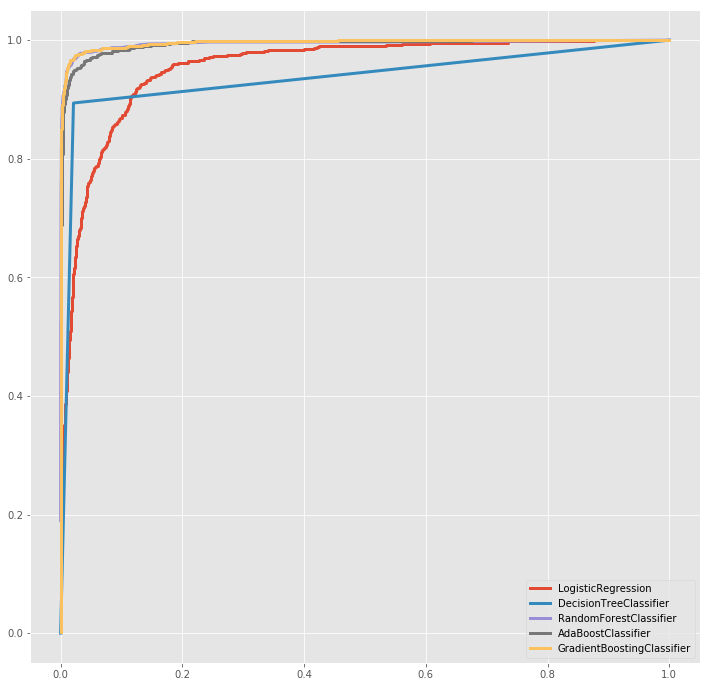

In [727]:
for classer in models[1:]:
    probas = classer.predict_proba(x_test)
    fpr, tpr, thresholds = roc_curve(y_test, probas[:, 1])
    roc_auc = auc(fpr, tpr)
    print(classer.steps[1][1].__class__.__name__, roc_auc)
    plt.plot(fpr, tpr, lw=3, label=classer.steps[1][1].__class__.__name__)
plt.legend(loc='best')

In [721]:
for classer in models[2:]:
    feat_impor = classer.steps[1][1].feature_importances_
    x_feat = pd.DataFrame({'cols': x.columns, 'feat_impo': feat_impor})
    print(classer.steps[1][1].__class__.__name__, '\n', x_feat.sort_values(by='feat_impo', ascending=False))

DecisionTreeClassifier 
                   cols  feat_impo
29              len_pp   0.711593
33              q_sold   0.057807
0   approx_payout_date   0.030394
24        user_created   0.028795
9                  gts   0.015189
27     venue_longitude   0.014433
21      sale_duration2   0.014081
19         org_twitter   0.013580
17           object_id   0.010370
1          body_length   0.008853
14         name_length   0.008655
28     description_len   0.008549
15           num_order   0.007183
26      venue_latitude   0.007174
7          event_start   0.006360
25           user_type   0.006354
23            user_age   0.005428
4        event_created   0.005242
20       sale_duration   0.005205
32              len_tt   0.005145
5            event_end   0.004738
18        org_facebook   0.004736
6      event_published   0.004692
31        good_country   0.004033
30          good_email   0.003800
16         num_payouts   0.003386
22            show_map   0.002878
13              listed 

In [636]:
y_preds = []
for mod in models[3:]:
    y_preds.append(mod.predict(x_test))

In [637]:
pred_columns = []
for i, mod in enumerate(models[3:]):
    col_name = mod.steps[1][1].__class__.__name__+'_pred'
    x_test[col_name] = y_preds[i]
    pred_columns.append(col_name)

/home/applesauce/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [638]:
pred_columns

['RandomForestClassifier_pred',
 'AdaBoostClassifier_pred',
 'GradientBoostingClassifier_pred']

In [639]:
x_test['avg_pred'] = (np.mean(x_test[pred_columns], axis=1) > .5) * 1

/home/applesauce/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [640]:
x_test['avg_pred'].value_counts()

0    6561
1     608
Name: avg_pred, dtype: int64

In [641]:
print('rec', recall_score(y_test, x_test['avg_pred']))
print('prec', precision_score(y_test, x_test['avg_pred']))
print(pd.crosstab(y_test, x_test['avg_pred']))
print(classification_report(y_test, y_pred))
print('----------------------------')

rec 0.919254658385
prec 0.973684210526
avg_pred     0    1
fraud              
0         6509   16
1           52  592
             precision    recall  f1-score   support

          0       0.99      1.00      0.99      6525
          1       0.96      0.92      0.94       644

avg / total       0.99      0.99      0.99      7169

----------------------------


In [642]:
from sklearn.decomposition import PCA

In [643]:
pca = make_pipeline(StandardScaler(), PCA(n_components=2))

In [644]:
x_new = pca.fit_transform(x)

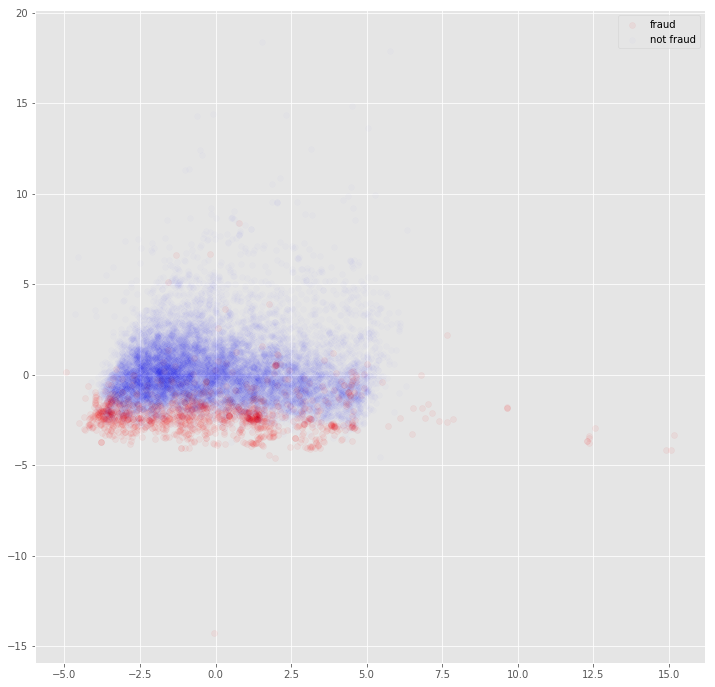

In [661]:
fig, ax = plt.subplots()
x_new_one = x_new[y==1]
x_new_zero = x_new[y==0]
ax.scatter(x_new_one[:,0], x_new_one[:,1], c='red', label='fraud', alpha=.05)
ax.scatter(x_new_zero[:,0], x_new_zero[:,1], c='blue', label='not fraud', alpha=.01)
plt.legend(loc='best')